<section style="text-align: center; padding: 20px;">
  <h2 style="color: #2c3e50; font-size: 32px;">🔧 Model Training</h2>
  <img src="https://cdn-icons-png.flaticon.com/512/2721/2721294.png" alt="Model Training Icon" width="120" style="margin-top: 10px;">
  <p style="max-width: 700px; margin: 20px auto; font-size: 18px; color: #ffffff;">
    In this notebook, we build and train machine learning models using the processed data to predict forest fire occurrence.
  </p>
</section>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('final.csv')

In [4]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,1.3,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,1.0,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,0.3,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,0.0,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,1.2,0.5,0


In [5]:
# 1.Features partition
X=df.drop(columns=['FWI'],axis=1)
y=df['FWI']

In [6]:
X.shape,y.shape

((243, 10), (243,))

In [7]:
# 2.Train test Split
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [9]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((162, 10), (81, 10), (162,), (81,))

In [10]:
# 3.Standardize
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
X_train,X_test

(array([[-0.18998654,  1.40355772, -1.12656349, ..., -0.19749796,
         -0.11433646,  0.9877296 ],
        [-1.21212815,  0.49039968,  0.52256258, ..., -0.3124764 ,
          0.09352209, -1.01242284],
        [ 0.26429862, -0.42275835,  0.24770824, ...,  0.66867301,
          0.09352209,  0.9877296 ],
        ...,
        [-1.66641331,  1.40355772, -1.95112653, ..., -1.06366892,
         -1.06124763, -1.01242284],
        [ 1.5135828 , -0.42275835,  0.52256258, ...,  0.3314029 ,
          0.60162077,  0.9877296 ],
        [-0.53070041,  1.40355772, -0.5768548 , ..., -1.01767754,
         -0.85338908, -1.01242284]]),
 array([[ 1.05929765e+00, -1.33591638e+00, -3.02000454e-01,
          8.02841227e-02, -2.27628673e-01, -3.84476576e-01,
          6.43451873e-01, -7.48542807e-02,  2.08999063e-01,
         -1.01242284e+00],
        [-9.84985567e-01, -1.33591638e+00,  2.47708237e-01,
         -5.90129685e-01, -9.87955373e-01, -3.84476576e-01,
          7.49493788e-01, -4.04459160e-01,  3.

In [13]:
# 4.Train the model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [14]:
regressor.fit(X=X_train,y=y_train)

LinearRegression()

In [15]:
X.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI',
       'Region'],
      dtype='object')

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   Temperature  243 non-null    int64  
 3   RH           243 non-null    int64  
 4   Ws           243 non-null    int64  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   ISI          243 non-null    float64
 9   Region       243 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 19.1 KB


In [15]:
regressor.intercept_,regressor.coef_

(np.float64(7.221604938271604),
 array([ 0.20416239,  0.15418297, -0.03167612, -0.13173662, -0.00846564,
        -0.02154563, -0.54977618,  3.7032055 ,  5.00159364, -0.40927093]))

In [16]:
y_pred=regressor.predict(X_test)

In [17]:
residuals=y_test-y_pred

In [18]:
from sklearn.metrics import r2_score

# Compute R² score
score = r2_score(y_true=y_test, y_pred=y_pred)

# Compute Adjusted R²
n = len(y_test)             # number of observations
p = X_test.shape[1]         # number of predictors (features)
adj_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)

# Print the metrics
print("-- Metrics Summary --")
print(f"R² score     : {score:.4f}")
print(f"Adjusted R²  : {adj_r2:.4f}")


-- Metrics Summary --
R² score     : 0.9807
Adjusted R²  : 0.9779


In [19]:
X_test.shape

(81, 10)

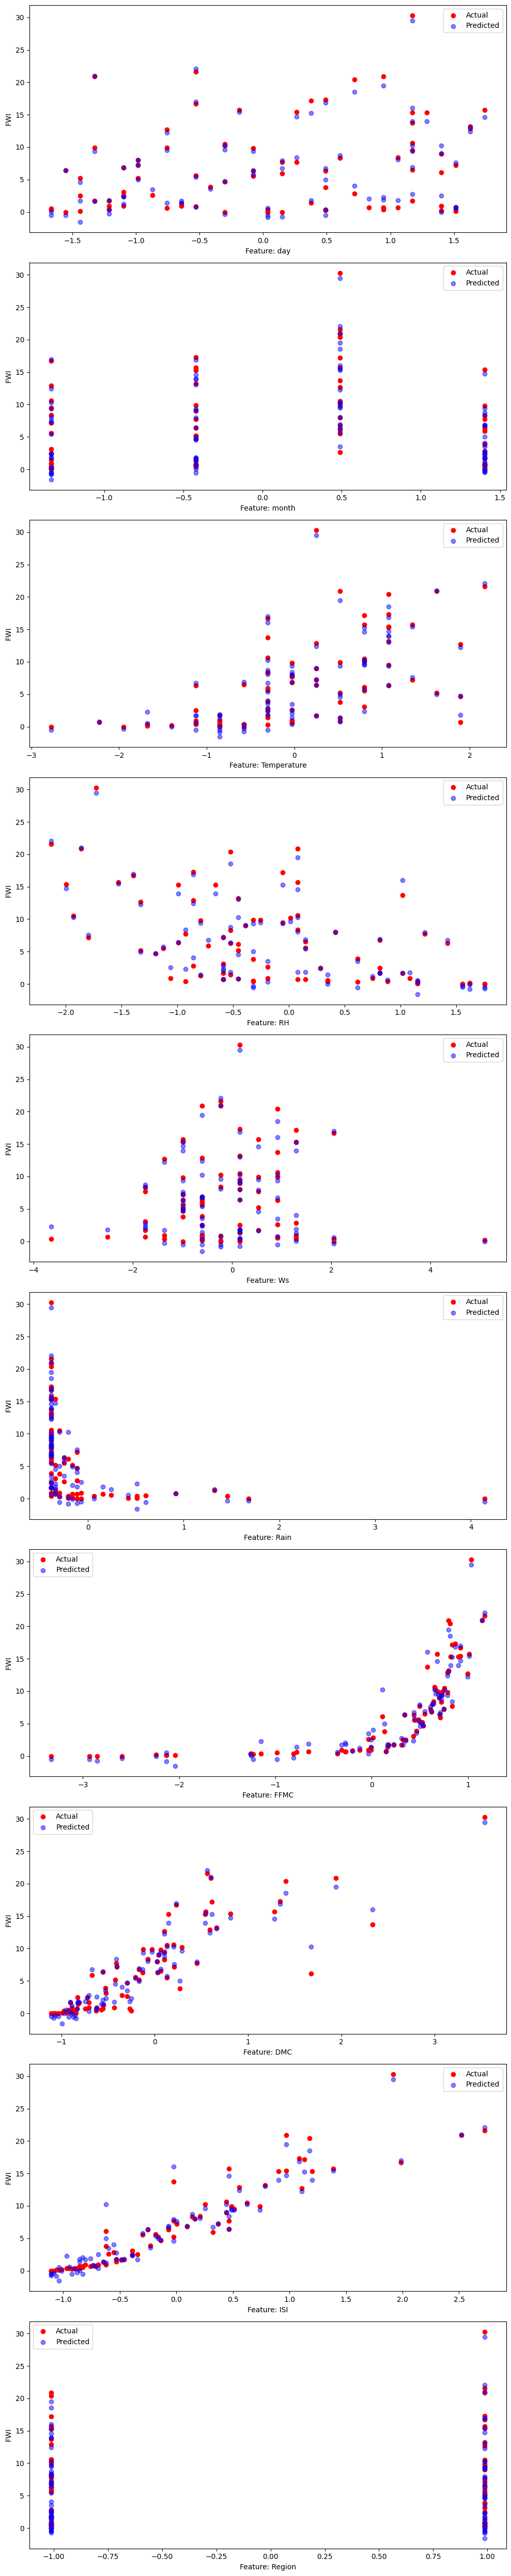

In [20]:
plt.figure(figsize=(10, 50))  # Size(not number of subplots) figure for multiple subplots

for i in range(X_test.shape[1]):
    plt.subplot(X_test.shape[1], 1, i + 1) 
    plt.scatter(X_test[:, i], y_test, color='red', label='Actual')
    plt.scatter(X_test[:, i], y_pred, color='blue', alpha=0.5, label='Predicted')
    plt.xlabel(f'Feature: {X.columns[i]}')
    plt.ylabel('FWI')
    plt.legend()
    plt.tight_layout()

plt.show()


In [21]:
# Assumptions

In [22]:
y_pred

array([ 8.06982710e+00,  7.25950594e+00, -5.42920172e-01,  4.98775159e+00,
        6.87519027e+00,  1.80817428e+00,  1.70998724e+00,  7.56975138e+00,
        1.73326853e+00,  4.03968296e+00,  6.31303371e-01,  1.02425441e+01,
        9.37365655e+00,  1.68695238e+01,  1.85449352e+01,  1.41660646e+00,
        2.27918980e+00, -5.08459725e-01,  6.90168329e+00,  2.34292705e+00,
        1.64225451e+00,  2.49367012e-01,  6.74051230e+00,  2.05114857e-02,
        2.10144498e+01,  4.71496691e+00,  5.37880660e+00,  9.62906854e+00,
       -4.86720218e-01,  9.35828176e+00,  6.74394555e+00, -2.82263900e-01,
        1.02565034e+01,  1.45840070e+01,  1.82042196e+00,  3.55822856e-01,
        1.75924373e+00,  5.76256742e+00, -8.11451199e-01, -4.88117577e-02,
        6.41328900e+00,  2.77517048e+00,  8.75540098e+00, -7.19622877e-01,
        1.54322729e+01,  8.02372719e+00,  7.92634656e+00,  1.40777974e+00,
        1.30592429e+01,  1.85291554e+00,  2.94778487e+01,  4.97800119e+00,
        1.69800143e+01,  

In [23]:
y_test

24      8.4
6       7.2
152     0.5
232     3.8
238     6.5
       ... 
241     0.7
5       2.5
56     15.3
124     0.1
147     9.5
Name: FWI, Length: 81, dtype: float64

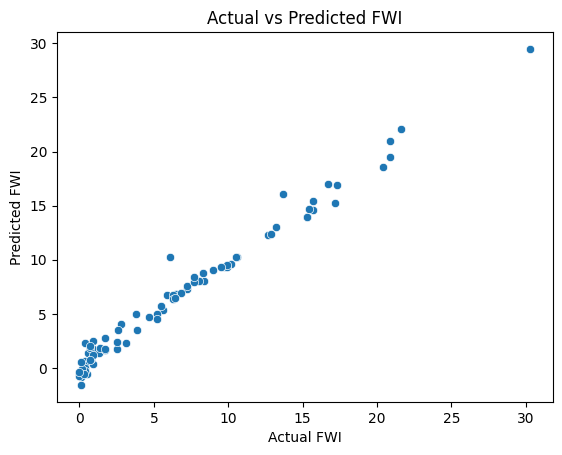

In [24]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI")
plt.show()

<Axes: xlabel='FWI'>

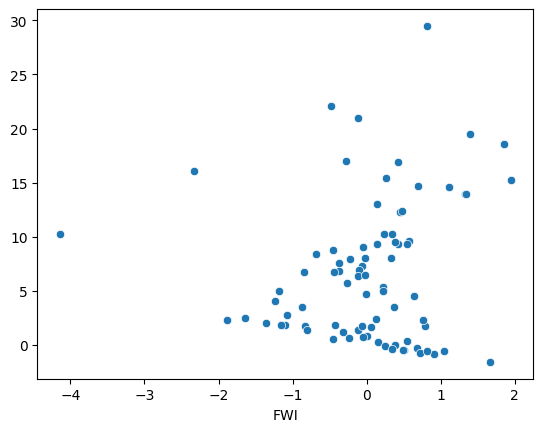

In [25]:
sns.scatterplot(y=y_pred,x=residuals)

<Axes: xlabel='FWI', ylabel='Density'>

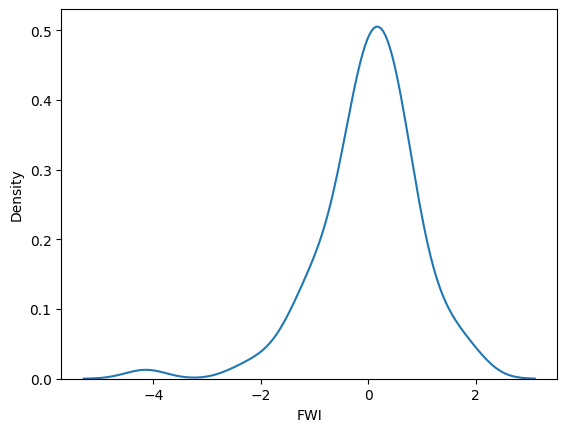

In [26]:
sns.kdeplot(residuals)

Lasso model


-- Model Summary --
Coefficients : [ 0.          0.          0.         -0.          0.         -0.
  0.          3.11237135  4.01541979 -0.        ]
Intercept    : 7.221604938271604

-- Metrics Summary --
R² score     : 0.9514
Adjusted R²  : 0.9445


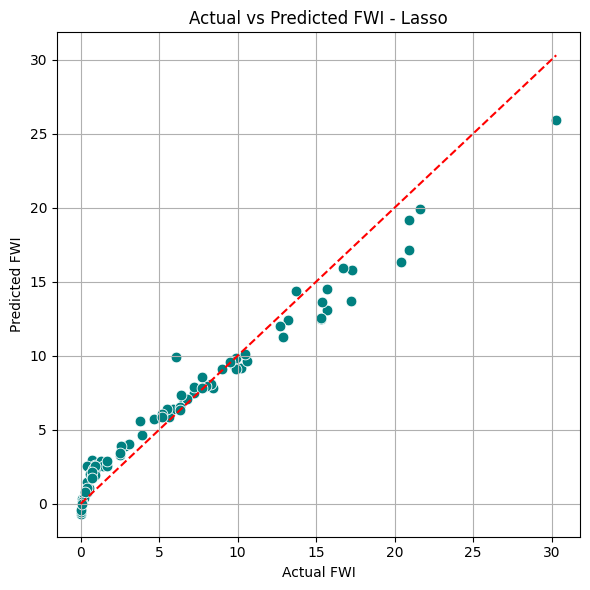

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Model Training ===
lasso = Lasso()
lasso.fit(X_train, y_train)

print("\n-- Model Summary --")
print(f"Coefficients : {lasso.coef_}")
print(f"Intercept    : {lasso.intercept_}")

# === Prediction ===
y_pred = lasso.predict(X_test)

# === Metrics Calculation ===
score = r2_score(y_true=y_test, y_pred=y_pred)

n = len(y_test)            # number of observations
p = X_test.shape[1]        # number of predictors
adj_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)

print("\n-- Metrics Summary --")
print(f"R² score     : {score:.4f}")
print(f"Adjusted R²  : {adj_r2:.4f}")

# === Assumption Check: Actual vs Predicted Plot ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI - Lasso")
plt.grid(True)
plt.tight_layout()
plt.show()


Ridge Regression


-- Model Summary --
Coefficients : [ 0.2133821   0.1649743  -0.02469646 -0.16512     0.01215619 -0.02232284
 -0.49129831  3.68333758  4.90737716 -0.40178142]
Intercept    : 7.221604938271604

-- Metrics Summary --
R² score     : 0.9796
Adjusted R²  : 0.9767


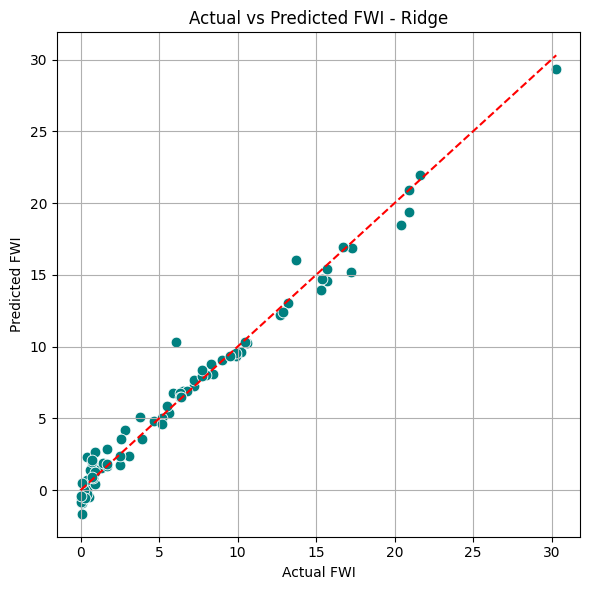

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Model Training ===
ridge = Ridge()
ridge.fit(X_train, y_train)

print("\n-- Model Summary --")
print(f"Coefficients : {ridge.coef_}")
print(f"Intercept    : {ridge.intercept_}")

# === Prediction ===
y_pred = ridge.predict(X_test)

# === Metrics Calculation ===
score = r2_score(y_true=y_test, y_pred=y_pred)

n = len(y_test)            # number of observations
p = X_test.shape[1]        # number of predictors
adj_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)

print("\n-- Metrics Summary --")
print(f"R² score     : {score:.4f}")
print(f"Adjusted R²  : {adj_r2:.4f}")

# === Assumption Check: Actual vs Predicted Plot ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI - Ridge")
plt.grid(True)
plt.tight_layout()
plt.show()


ElasticNet


-- Model Summary --
Coefficients : [ 0.3201337   0.          0.22061222 -0.5214912   0.         -0.
  0.65140393  2.45395392  2.59987038  0.        ]
Intercept    : 7.221604938271604

-- Metrics Summary --
R² score     : 0.8724
Adjusted R²  : 0.8541


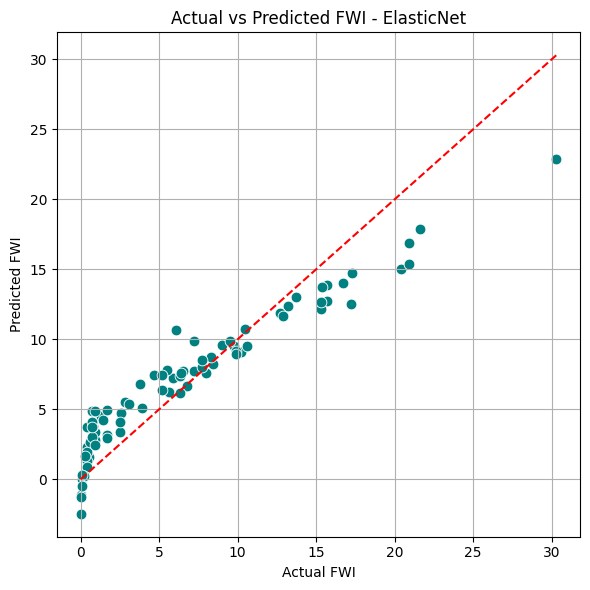

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Model Training ===
elasticNet = ElasticNet()
elasticNet.fit(X_train, y_train)

print("\n-- Model Summary --")
print(f"Coefficients : {elasticNet.coef_}")
print(f"Intercept    : {elasticNet.intercept_}")

# === Prediction ===
y_pred = elasticNet.predict(X_test)

# === Metrics Calculation ===
score = r2_score(y_true=y_test, y_pred=y_pred)

n = len(y_test)            # number of observations
p = X_test.shape[1]        # number of predictors
adj_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)

print("\n-- Metrics Summary --")
print(f"R² score     : {score:.4f}")
print(f"Adjusted R²  : {adj_r2:.4f}")

# === Assumption Check: Actual vs Predicted Plot ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI - ElasticNet")
plt.grid(True)
plt.tight_layout()
plt.show()


HyperParameter Tuning

RidgeCV


-- Model Summary --
Coefficients : [ 0.2133821   0.1649743  -0.02469646 -0.16512     0.01215619 -0.02232284
 -0.49129831  3.68333758  4.90737716 -0.40178142]
Intercept    : 7.221604938271604

-- Metrics Summary --
R² score     : 0.9796
Adjusted R²  : 0.9767


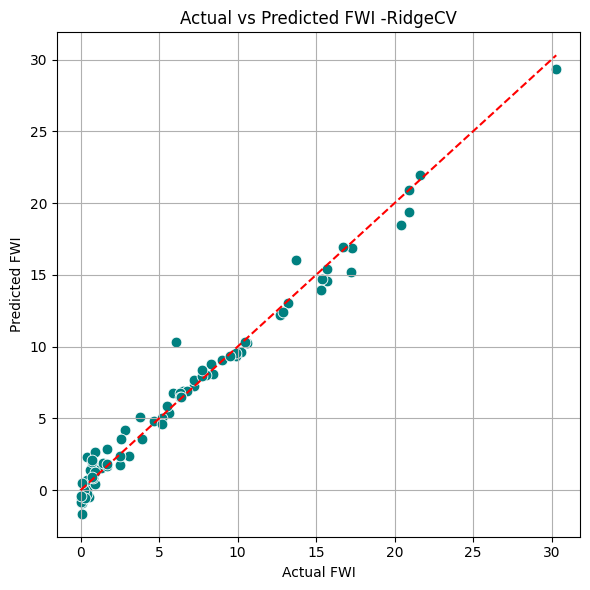

In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Model Training ===
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train, y_train)

print("\n-- Model Summary --")
print(f"Coefficients : {ridgecv.coef_}")
print(f"Intercept    : {ridgecv.intercept_}")

# === Prediction ===
y_pred = ridgecv.predict(X_test)

# === Metrics Calculation ===
score = r2_score(y_true=y_test, y_pred=y_pred)

n = len(y_test)            # number of observations
p = X_test.shape[1]        # number of predictors
adj_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)

print("\n-- Metrics Summary --")
print(f"R² score     : {score:.4f}")
print(f"Adjusted R²  : {adj_r2:.4f}")

# === Assumption Check: Actual vs Predicted Plot ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI -RidgeCV")
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
# parameters
ridgecv.alphas
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

LassoCV


-- Model Summary --
Coefficients : [ 0.16428579  0.12953032 -0.         -0.02924261  0.          0.
 -0.39222772  3.66204798  4.93693593 -0.35156623]
Intercept    : 7.221604938271604

-- Metrics Summary --
R² score     : 0.9810
Adjusted R²  : 0.9782


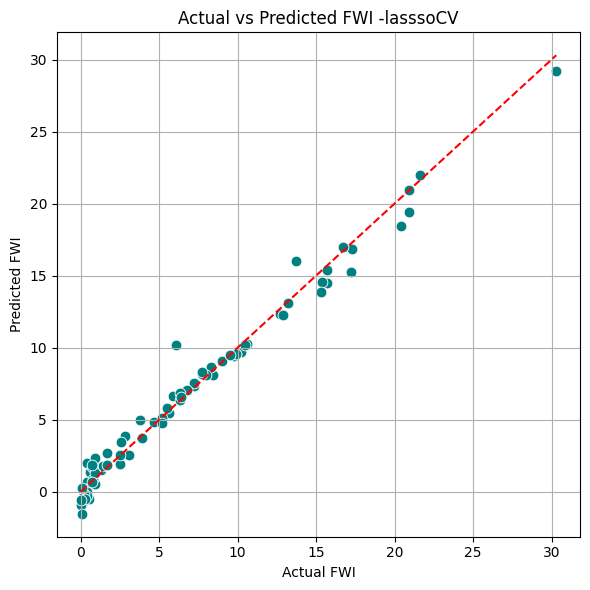

In [36]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Model Training ===
lassocv = LassoCV(cv=5)
lassocv.fit(X_train, y_train)

print("\n-- Model Summary --")
print(f"Coefficients : {lassocv.coef_}")
print(f"Intercept    : {lassocv.intercept_}")

# === Prediction ===
y_pred = lassocv.predict(X_test)

# === Metrics Calculation ===
score = r2_score(y_true=y_test, y_pred=y_pred)

n = len(y_test)            # number of observations
p = X_test.shape[1]        # number of predictors
adj_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)

print("\n-- Metrics Summary --")
print(f"R² score     : {score:.4f}")
print(f"Adjusted R²  : {adj_r2:.4f}")

# === Assumption Check: Actual vs Predicted Plot ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI -lasssoCV")
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
# parameters
lassocv.alpha_
lassocv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

ElasticNetCV


-- Model Summary --
Coefficients : [ 0.20557207  0.1611697  -0.00702184 -0.14189485  0.01433948 -0.
 -0.42514064  3.66486241  4.86366927 -0.38598322]
Intercept    : 7.221604938271604

-- Metrics Summary --
R² score     : 0.9793
Adjusted R²  : 0.9764


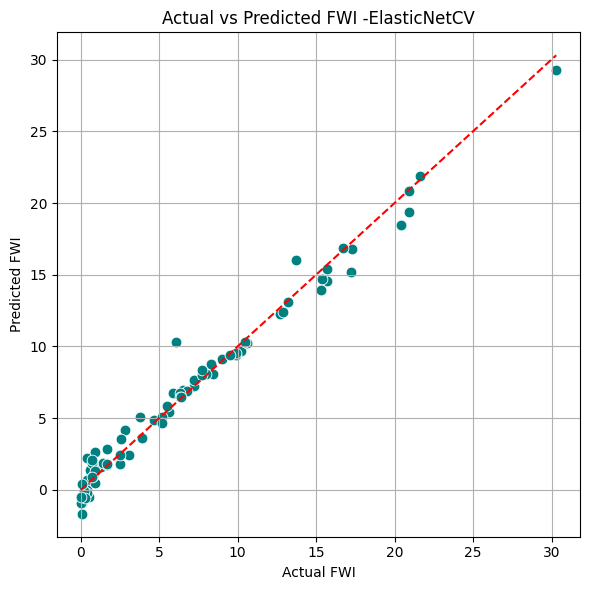

In [41]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# === Model Training ===
elasticNetcv = ElasticNetCV(cv=5,l1_ratio=0.5)
elasticNetcv.fit(X_train, y_train)

print("\n-- Model Summary --")
print(f"Coefficients : {elasticNetcv.coef_}")
print(f"Intercept    : {elasticNetcv.intercept_}")

# === Prediction ===
y_pred = elasticNetcv.predict(X_test)

# === Metrics Calculation ===
score = r2_score(y_true=y_test, y_pred=y_pred)

n = len(y_test)            # number of observations
p = X_test.shape[1]        # number of predictors
adj_r2 = 1 - (1 - score) * (n - 1) / (n - p - 1)

print("\n-- Metrics Summary --")
print(f"R² score     : {score:.4f}")
print(f"Adjusted R²  : {adj_r2:.4f}")

# === Assumption Check: Actual vs Predicted Plot ===
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color='teal', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45° line
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Actual vs Predicted FWI -ElasticNetCV")
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
import pickle 

In [44]:
# Dump scaler,model

In [45]:
scaler

StandardScaler()

In [46]:
lassocv

LassoCV(cv=5)

In [50]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [51]:
pickle.dump(lassocv,open('model.pkl','wb'))